# Import library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense

# Download Dataset

The dataset is about the compressive strength of different samples of concrete based on the volumes of the different materials that were used to make them. Ingredients include:

1. Cement

2. Blast Furnace Slag

3. Fly Ash

4. Water

5. Superplasticizer

6. Coarse Aggregate

7. Fine Aggregate

In [2]:
dataset = pd.read_csv('https://ibm.box.com/shared/static/svl8tu7cmod6tizo6rk0ke4sbuhtpdfx.csv')
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa.

Let's check how many data points we have.

In [3]:
dataset.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.

Let's check the dataset for any missing values.

In [4]:
dataset.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
dataset.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.

# Normalize the Data

In [6]:
dataset_norm = (dataset - dataset.mean()) / dataset.std()
dataset_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597,2.644123
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597,1.560663
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340,0.266498
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221,0.313188
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069,0.507732


In [7]:
target = dataset_norm['Strength']
target.head()

0    2.644123
1    1.560663
2    0.266498
3    0.313188
4    0.507732
Name: Strength, dtype: float64

In [8]:
dataset = dataset_norm.drop('Strength', axis = 1)
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [9]:
n_cols = dataset.shape[1]

# Build a Neural Network

In [10]:
def regression():
    model = Sequential()
    model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(20, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(5, activation = 'relu'))
    model.add(Dense(1))

    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['acc'])
    return model

In [11]:
model = regression()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 7,241
Trainable params: 7,241
Non-trainable params: 0
______________________________________________________

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size = 0.2)

# Train and Test the Network

In [13]:
model.fit(X_train, y_train, epochs = 1000 ,  verbose = 1)

Epoch 1/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.8640 - acc: 0.0000e+00
Epoch 2/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.6916 - acc: 0.0000e+00
Epoch 3/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.5791 - acc: 0.0000e+00
Epoch 4/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.4422 - acc: 0.0000e+00
Epoch 5/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3061 - acc: 0.0000e+00
Epoch 6/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2245 - acc: 0.0000e+00
Epoch 7/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1756 - acc: 0.0000e+00
Epoch 8/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1472 - acc: 0.0000e+00
Epoch 9/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1299 - acc: 0.0000e+00
Epoch 10/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.1164 - acc: 0.0000e+00
Epoch 11/

# Predict result

In [14]:
predict = model.predict(X_test)

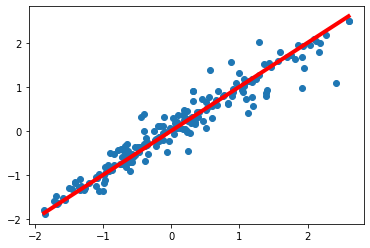

In [15]:
plt.scatter(y_test, predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', lw=4)